# Module 4 Part 2: The Hadoop Distributed File System

## Introduction
Apache Hadoop is an ecosystem of software modules and frameworks that collectively form a highly scalable system for doing analytics on massive datasets.  The Apache Hadoop project was born from the need to efficiently process and analyze data at Internet scale.  Relational databases are very nice for doing queries but are too slow for truly big (terabytes or petabytes of) data. In this module we will explore the Apache Hadoop ecosystem and related tools.

This module consists of 2 parts:

- **Part 1** - Distributed Datastores
- **Part 2** - The Hadoop Distributed File System

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

## Learning Outcomes

In this module, you will learn the following:
* Examine the Hadoop Distributed File System as an example of a distributed filesystem



## Readings and Resources

We invite you to further supplement this notebook with the following recommended texts.

- George, L, Kunigk, J., Wilkinson, P., and Buss, I. (2018). Architecting Modern Data Platforms. A Guide to Enterprise Hadoop at Scale. O’Reilly. http://shop.oreilly.com/product/0636920054825.do

- Holmes, A. (2014). Hadoop in Practice, 2nd Edition. Manning. https://www.oreilly.com/library/view/hadoop-in-practice/9781617292224/

- Sammer, E. (2012). Hadoop Operations.  A Guide for Developers and Administrators. O’Reilly. http://shop.oreilly.com/product/0636920025085.do

- Seidman, J., Shapira, G., Malaska, T., and Grover, M. (2015).  Hadoop Application Architectures. O’Reilly. 2015.  http://shop.oreilly.com/product/0636920033196.do

- Wampler, D., Rutherglen, J., and Capriolo, E. (2012). Programming Hive. Data Warehouse and Query Language for Hadoop. O’Reilly. http://shop.oreilly.com/product/0636920023555.do

- White, T. (2015). Hadoop: The Definitive Guide 4th Edition. O’Reilly. http://shop.oreilly.com/product/0636920033448.do

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-4-Part-2:-The-Hadoop-Distributed-File-System" data-toc-modified-id="Module-4-Part-2:-The-Hadoop-Distributed-File-System">Module 4 Part 2: The Hadoop Distributed File System</a></span>
<ul class="toc-item">
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
</ul>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
<ul class="toc-item">
<li><span><a href="#Hadoop-Distributed-File-System-(HDFS)" data-toc-modified-id="Hadoop-Distributed-File-System-(HDFS)">Hadoop Distributed File System (HDFS)</a></span>
<ul class="toc-item">
<li><span><a href="#HDFS-Clusters" data-toc-modified-id="HDFS-Clusters">HDFS Clusters</a></span>
</li>
<li><span><a href="#HDFS-Data-Integrity" data-toc-modified-id="HDFS-Data-Integrity">HDFS Data Integrity</a></span>
</li>
<li><span><a href="#HDFS-Compression" data-toc-modified-id="HDFS-Compression">HDFS Compression</a></span>
</li>
<li><span><a href="#HDFS-High-Availability" data-toc-modified-id="HDFS-High-Availability">HDFS High Availability</a></span>
</li>
<li><span><a href="#Hadoop-File-Formats" data-toc-modified-id="Hadoop-File-Formats">Hadoop File Formats</a></span>
<ul class="toc-item">
<li><span><a href="#Optimized-Row-Columnar-(ORC)" data-toc-modified-id="Optimized-Row-Columnar-(ORC)">Optimized Row Columnar (ORC)</a></span>
</li>
<li><span><a href="#Parquet" data-toc-modified-id="Parquet">Parquet</a></span>
</li>
<li><span><a href="#Avro" data-toc-modified-id="Avro">Avro</a></span>
</li>
</ul>
</li>
</ul>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

## Hadoop Distributed File System (HDFS)
The Hadoop Distributed File System (HDFS) is the main storage system used to store and retrieve data across a distributed cluster of nodes when using Hadoop.  HDFS is based on the Google File System and so is also highly scalable, fault tolerant and reliable.  In addition, HDFS can run on affordable and easy to obtain commodity hardware (i.e. on cheap, mass-produced general-purpose servers).

The HDFS architecture is based on the following guiding principles:
* **Tolerance of Hardware Failure** – the file system should be able to detect hardware failures and automatically recover from these system failures.
* **Streaming Data Access** – the file system should support high throughput of data.  
* **Large Data Sets** – the file system should be able to support file sizes of gigabytes to petabytes.  Moreover, the system should be able to support tens of millions of files.
* **Simple Coherency Model** - Internet-scale analytics applications need to capture large volumes of data arriving that needs to be written to disk quickly so nothing is lost. If the data is to be used for analytics it won't need to be updated once stored i.e. it's an immutable record of history.  HDFS files can be added to at the end only, as new data comes in, but not modified later.  In order to capture data fast (a key Hadoop design goal) HDFS does not support indexes, transactions or in-place editing like relational datastores.
* **“Moving Computation is Cheaper than Moving Data”** – the file system should provide the ability to execute computational jobs so that they are physically close to the data.  This achieves data locality to minimize network congestion and improve the overall performance of the system.  Hadoop sends the (usually short) programs out to the servers to run rather than bringing the data from where it is stored to where it will be processed.  This is the reverse of the traditional client-server system design where data is stored in database servers and moves to application servers for business logic processing.
* **Portability Across Heterogeneous Hardware and Software Platforms** – to maximize widespread adoption, the file system should be supported on as many different platforms as possible. 

### HDFS Clusters
HDFS runs on a distributed system that is based on a **cluster computing** architecture.  A **cluster** is a group of one or more computers or systems referred to as **nodes** that work together as a single centralized data processing resource. A cluster being managed by Hadoop will have anywhere from a handful of nodes for an experimental setup to tens of thousands for an Internet portal like Yahoo!. Nodes within the cluster communicate with each other using a dedicated network as the speed of communication between the nodes can be a key determinant of how fast it can complete a computation.

Hadoop's benefits such as performance, scalability, and fault tolerance are a result of using this kind of cluster architecture.  For instance, to scale out the system, one can easily add nodes to an existing cluster to boost the computing power.  Also, if a node fails and goes down, other nodes in the cluster can take over and handle completing the computation.

HDFS clusters are based on a master-slave cluster model where a master node manages a set of slave nodes.   Each HDFS node is one of the two types, with workers being more numerous than masters:

* **Master Node** – Master nodes keep track of where data is stored within the clusters' data-storing nodes and manage the MapReduce tasks running in the cluster. There is one specific type of master node that is critical to the operation of a Hadoop cluster called the NameNode.  The responsibility of the NameNode is to provide centralized access to keep track of all information associated with a file (i.e. the metadata).  The NameNode is also responsible for managing data replication across all its slave nodes.  
* **Slave/Worker Node** - Slave/Worker nodes store copies of the data and run the MapReduce tasks on the data stored in them.  

HDFS supports the hierarchical directory structure of a traditional file system such as folders and files.  The directory structure is managed by a special node called the NameNode. Data is stored in **blocks** that are spread across nodes.  By default, the size of a block is 128MB.  Whereas traditional file systems store a file on a single hard drive and try to keep the file blocks contiguous on disk, the contents of a file larger than 128MB in HDFS will be split into multiple data blocks, each stored in their own separate host operating system file but still appearing to the HDFS user as if it were a single file.  Hadoop manages the illusion that it is a single file so the user doesn't need to be concerned with it.  The service that runs on a node and manages data on that node is called **DataNode**.

This way HDFS can store files that are bigger than a disk drive could otherwise hold, and blocks can be replicated so that if a disk fails the data is not lost.  By default, HDFS makes 3 copies of each data block and places the two copies on other nodes.  The number of copies is known as the replication factor.

Consider the following diagram that shows the relationship between NameNodes, DataNodes and data blocks with a replication factor of 2.  Notice that there are 2 copies of each file spread across the DataNodes.  Also notice that the contents of the files are split into multiple data blocks.  For example, consider the file ‘/usr/myfiles/report.csv’.  This file is split into two blocks, indicated by block 1 and block 2.  Since the replication factor is set to 2, we have two copies of block 1 and block 2.  One copy of block 1 is stored on DataNode 1 while the second copy is stored on DateNode 3.  Similarly, there are two copies of block 2, one stored on DataNode 1 and one on DataNode 2.

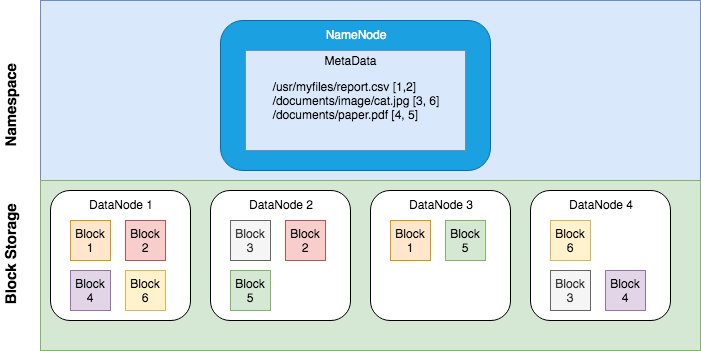

### HDFS Data Integrity
Data corruption can occur in any system when data is written to disk or during transit within the network, due to hardware failure or transmission errors.  HDFS detects data corruption when reading data stored on disk or receiving data from the network by verifying the data’s **checksum**.  A checksum is a small set of additional information generated by the stored or transmitted data for the purpose of helping detect any integrity issues with the data.  When data is received by the DataNodes, it will verify the data’s checksum before writing the data to a data block on HDFS.  Similarly, when a data block is read from HDFS, the checksum will be verified.  The DataNode keeps a log of the time when the data block was last verified.  Periodically, HDFS will scan logs to see if any of the data blocks have failed their checksum verification or if any of the disks holding copies fail to respond.  If a checksum verification has failed this means that the data block is corrupted.  HDFS will replace the failed data block with one of the good copies from another DataNode.  Thus, HDFS automatically ensures data integrity of the data.

### HDFS Compression
HDFS compresses the data stored on the file system to save space and maximize the storage.  Compressing the data also means that it takes less bandwidth to transfer data across the cluster of nodes.  HDFS supports several compression formats such as Gzip, BZip, DEFLATE and LZO.  The encryption mechanism is transparent to clients.  Thus, clients are unaware that the data is encrypted on HDFS.

### HDFS High Availability
HDFS achieves high availability by configuring the cluster in an **Active-Passive configuration**.  In this configuration, each NameNode has a secondary NameNode that is not active and is on standby (passive).  The passive NameNode acts as a backup that is ready to take over if the active NameNode fails due to network connectivity issues or if it shuts down unexpectedly.  Clients only connect to the active NameNode.  If the active NameNode fails, HDFS will automatically failover to the Passive NameNode.  The failover process takes about a minute to complete.  

### Hadoop File Formats
Hadoop HDFS allows you to store data in many different file formats such as JSON, XML or CSV.  However, these human readable file formats may not be optimal for storing big data in a distributed file system.  There are three other file formats that have been developed to efficiently store data in a Hadoop cluster.  These file formats are **Optimized Row Columnar (ORC)**, **Avro** and **Parquet**, and provide the following optimizations over traditional file formats:

* **Compression** – the file formats are machine readable binary formats that provide some level of compression.  Compression is especially important if you are processing terabytes or petabytes of data.  
* **Splitability** – the file formats can easily be split across multiple partitions while file formats like raw JSON or XML cannot be split without some level of transformation.  Large-scale processing requires the data to be broken down so that independent jobs can process smaller pieces of the data in parallel. 
* **Interoperability** – all three file formats store metadata information with the data.   Since the data is self-described, any node in the cluster will know how to process an ORC, Parquet, or Avro file.
* **Schema Evolution** – Over the lifespan of an application the underlying data may change.  For example, new data types may be introduced or removed.  The file system must support when fields are added or deleted to the data schema.

#### Optimized Row Columnar (ORC)
ORC was developed by Hortonworks as a file format for Hive.  ORC is a column-oriented format that is optimized for read-intensive workloads such as data warehouse applications.  Column-oriented formats provide efficient compressed storage that can be easily partitioned across a cluster of nodes.  Organizations such as Facebook uses ORC to store petabytes of data (Facebook, 2014)
https://code.fb.com/core-data/scaling-the-facebook-data-warehouse-to-300-pb/

#### Parquet
Parquet is another column-oriented file format that was developed by Cloudera and Twitter.  Similar to ORC, the file format is optimized for read-intensive workloads and is commonly used with Impala (one ofthe query engines used by analysts and data scientists to perform data analytics on data stored in Hadoop).  

#### Avro
Avro is a row-oriented file format that was developed by the Hadoop working group in 2009.  The schema is stored in JSON format while the data is stored in binary format.  Since the data is stored in binary format, it makes the data compact and fast to process.  The row-oriented file format makes it optimal for write-intensive workloads since new data can simply be appended as an additional row to the end of the datastore.  One of the key features of Avro is its robust support for schema evolution so that old programs can process new schema changes while new programs can process data based on an old schema.

The following table compares the difference between the big data file formats and ranks which format has better support for certain features (Saurabh, S., 2018). 

| Features | Avro | Parquet | ORC |
|----------|----------|----------|----------|
| Schema Evolution Support | 1st | 3rd | 2nd |
| Compression Support | 2nd | 3rd | 1st |
| Splitability Support | 2nd | 2nd | 1st |
| Most Compatible Platforms | Kafka, Druid | Impala, Arrow, Drill, Spark | Hive, Presto |
| Row or Column Oriented | Row | Column | Column |
| Optimized for Read or Write | Write | Read | Read |

**End of Module**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, you may proceed to the next module.

# References

Apache Drill. (Public Domain). Architecture Introduction. Retrieved from https://drill.apache.org/docs/architecture-introduction/

Apache Flume. (Public Domain). Flume 1.9.0 User Guide. Retrieved from https://flume.apache.org/releases/content/1.9.0/FlumeUserGuide.html

Apache Hadoop. (Public Domain). HDFS Architecture.  https://hadoop.apache.org/docs/r3.0.0/hadoop-project-dist/hadoop-hdfs/HdfsDesign.html

Apache Hadoop.  (Public Domain). HDFS Federation. Retrieved from   https://hadoop.apache.org/docs/r3.0.3/hadoop-project-dist/hadoop-hdfs/Federation.html

HortonWorks. (Public Domain). An Introduction to HDFS Federation. Retrieved from  
https://hortonworks.com/blog/an-introduction-to-hdfs-federation/

Apache Hadoop.  (Public Domain). MapReduce Tutorial. Retrieved from  https://hadoop.apache.org/docs/r3.0.3/hadoop-mapreduce-client/hadoop-mapreduce-client-core/MapReduceTutorial.html

Apache Hive. (Public Domain). Hive Design. Retrieved from https://cwiki.apache.org/confluence/display/Hive/Design

Azkaban. (Public Domain). Azkaban documentation!. Retrieved from https://azkaban.readthedocs.io/en/latest/

BMC Software. (Public Domain). Hadoop Clusters : An Introduction.  Hadoop Guide. Retrieved from  http://www.bmcsoftware.ca/guides/hadoop-clusters.html

Difference between Pig and Hive-The Two Key Components of Hadoop Ecosystem.  DeZyre.  (Public Domain).  https://www.dezyre.com/article/difference-between-pig-and-hive-the-two-key-components-of-hadoop-ecosystem/79

Facebook. (Public Domain). Scaling the Facebook data warehouse to 300 PB.  Retrieved from https://code.fb.com/core-data/scaling-the-facebook-data-warehouse-to-300-pb/

Hortonworks. (Public Domain). Ambari Overview. Retrieved from https://hortonworks.com/apache/ambari/

Hortonworks. (Public Domain). Apache Hadoop YARN – Background and an Overview.  Retrieved from https://hortonworks.com/blog/apache-hadoop-yarn-background-and-an-overview/
  
Hortonworks. (Public Domain). Apache Ranger. Retrieved from https://hortonworks.com/apache/ranger/

Hortonworks.  (Public Domain). Introduction to Apache Falcon: Data Governance for Hadoop.  Retrieved from  https://hortonworks.com/blog/introduction-apache-falcon-hadoop/

IBM Big Data & Analytics Hub. (Public Domain).  What is Hadoop? Retrieved from https://www.ibmbigdatahub.com/blog/what-hadoop

Kafka. (Public Domain). Introduction.  Retrieved from https://kafka.apache.org/intro

Mahout. (Public Domain). Mahout.  Retrieved from https://mahout.apache.org/docs/latest/

Miner, D., Radtka, Z. M. (2015). Chapter 1. Hadoop Distributed File System (HDFS), Hadoop with Python.  Boston, MA: O'Reilly Media, Inc.

Saurabh, S., 2018, An Introduction to Big Data Formats Understanding Avro, Parquet, and ORC, Nexla.com.  Retrieved from https://thinksis.com/wp-content/uploads/2018/10/Nexla_Whitepaper_Introduction-to-Big-Data-Formats-Saket-Saurabh.pdf

The Apache Software Foundation Blogging in Action. (Public Domain). Apache Sqoop - Overview. Retrieved from https://blogs.apache.org/sqoop/entry/apache_sqoop_overview

The Apache Software Foundation Blogging in Action. (Public Domain). Apache Sentry. Retrieved from https://blogs.apache.org/sentry/entry/sentry_graduates_to_a_top

Wikipedia. (Public Domain). Apache Hadoop. Retrieved from https://en.wikipedia.org/wiki/Apache_Hadoop

Wikipedia. (Public Domain). Map Reduce. Retrieved from https://en.wikipedia.org/wiki/MapReduce

Wikipedia. (Public Domain). Apache Mahout. Retrieved from 
https://en.wikipedia.org/wiki/Apache_Mahout

White, T (2010). Chapter 4. Hadoop I/O, Hadoop: The Definitive Guide, 2nd.  Boston, MA: O'Reilly Media, Inc.

Zookeeper. (Public Domain). Apache Zookeeper. Retrieved from https://zookeeper.apache.org/